# The Cournot Model

In [ ]:
In this project we will analyze the traditionel Cournot model, known from lectures in Microeconomics 1,2 and 3. In a Cournot model the firms competes in quantities thereby choosing the quantites taking into account the best response of the other firms to that quantity. Firstly, we set up a general case for N competeting firms. Then we will simplify the setting and analyze a case firm case. 

In [2]:
# Importing useful packages e
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab


from numpy import array
from scipy import linalg
from scipy import optimize



# Sympy package helps writting  

sm.init_printing(use_unicode=True)

from sympy import *

## The setting og the model:

We examine a market with $N$ firms, whom produce the same homogenous good. Furthermore we assume that the aggregate demand of the good x is linearly given by:
$$p(x)=c-x$$
Every firm $i$ has a costfunction given by:
$$C(x_i)=k*x_i^2$$ where the aggregate guantity in the market is given as $x=\sum_{j=0}^N(x_j)$

We then have that firm $i$ wish to maximize his profitfunction given by:
$$\underset{x_i}{max}: p(\sum_{j=0}^Nx_j)x_i)-C(x_i) =p(x)x_i-C(x_i)$$

So we have that firm $i$ is going to choose how much to produce given what the other firms in the market produces. It is intuitively that for $N\rightarrow \infty$ this modelsetup describes the setting of perfect competition. Futhermore it is intuitive to imagine that for $N\rightarrow 1$ the setting describes a monopolistic competition situation. These two outer cases will be examized later in the project.

We will now examine the more interessting case when there is only 2 firms  (A and B) competiting. We assume that firm a has a costfunction given by: $C_A=\frac{k}{2}*x_a^3$. The costfunction of firm b: $C_B=k*x_b^2$. 


In [4]:

# Defining the elements in the firms choice

c = sm.symbols('c')
qa, qb = sm.symbols('q_a q_b') 
k = sm.symbols('k')

In [16]:
# We start by defining the linear demand function:
def p_total(qa,qb,c):
    return (c-(qa+qb))

#Defining the cost function of firm A:
def c_A(qa,k):
    return ((k/2)*qa**2)

#Defining the cost function of firm B:
def c_B(qb,k):
    return (k*qb**2)

#The profitfunction of firm A:
def profit_A(qa,qb,c,k):
    return (p_total(qa,qb,c) * qa - c_A(qa,k))
    
#The profitfunction of firm B:
def profit_B(qa,qb,c,k):
    return (p_total(qa,qb,c) * qb - c_B(qb,k))

In [17]:
#We will now find the derivative, for which we will use to find the best response functions

foc_a = diff(profit_A(qa,qb,c,k),qa)
foc_b = diff(profit_B(qa,qb,c,k),qb)
display(foc_a,foc_b)


In [18]:
#We find the best responsefunctions by isolating respectively qa and qb in the above found derivatives
sola= sm.solve(sm.Eq(foc_a,0),qa)[0]
solb= sm.solve(sm.Eq(foc_b,0),qb)[0]
solb
print("\n Firm A's best response is given by: q_a = " + str(sola) + " and firm B's best response is given by: q_b =" + str(solb) )


 Firm A's best response is given by: q_a = (c - q_b)/(k + 2) and firm B's best response is given by: q_b =(c - q_a)/(2*(k + 1))


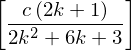

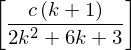

In [19]:
#To find the quantity firm A wants to produce we substitute firm B's best response function into firm A's best reponse and then solving for q_a 
sola_subs = foc_a.subs(qb,solb) #substituting the best response function of firm B into the FOC of firm A
sola_subs
q_astar = solve(sola_subs,qa) #Solving for q_a
solb_subs = foc_b.subs(qa,sola) #substituting the best response function of firm A into the FOC of firm B
q_bstar = solve(solb_subs,qb) #Solving for q_b
display ( q_astar, q_bstar) #Showing the optimal quantities

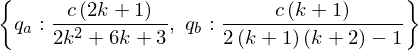

In [20]:
#Here we find the optimal quantities for both firms with another code. The result is identical with the result above. Here we just use that we can solve 2 equation with 2 unknowns.

solve([foc_a, foc_b], [qa, qb]) #solving 2 equations with 2 unknowns 


 The price of the good: -c*(k + 1)/(2*k**2 + 6*k + 3) - c*(2*k + 1)/(2*k**2 + 6*k + 3) + c


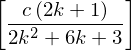

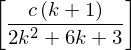

In [21]:
#We are now able of finding the prices the firms will take for the good and the profit each firm get:

#As the above quantities is given as lists we start by defining/converting the list into a float:
type(q_astar)
qqa=q_astar[0]
qqb=q_bstar[0]
#We can now find the price of the good:
print("\n The price of the good: " + str(p_total(qqa,qqb,c)) ) 

#We can now find the profit of each firm:
#Kan ikke få dette til at virke





# Numerical example

We will now examine the above 2 firm case, where we assume that $c=50$. Furthermore we assume that $k=3$

In [3]:
#We start by setting the values:
c=50
k=3

#The derivative:
foc_a = diff(profit_A(qa,qb,c,k),qa)
foc_b = diff(profit_B(qa,qb,c,k),qb)
display(foc_a,foc_b)

#The best responsefunctions 
sola= sm.solve(sm.Eq(foc_a,0),qa)[0]
solb= sm.solve(sm.Eq(foc_b,0),qb)[0]
print("\n Firm A's best response is given by: q_a = " + str(sola) + " and firm B's best response is given by: q_b =" + str(solb) )

solve([foc_a, foc_b], [qa, qb])


NameError: name 'profit_A' is not defined

In [23]:
#We can now calculate the quantity firm A wants to produce, using the best response function of firm b 
sola_subs = foc_a.subs(qb,solb) #substituting the best response into the FOC of firm A
q_astar = solve(sola_subs,qa) #Solving for q_a
solb_subs = foc_b.subs(qa,sola) #substituting the best response into the FOC of firm A
q_bstar = solve(solb_subs,qb)
display (q_astar, q_bstar)

In [24]:
#As the above quantities os given as lists we start by defining/converting the list into a float:
type(q_astar)
qqa=q_astar[0]
qqb=q_bstar[0]
#We can now find the price of the good:
print("\n The price of the good: " + str(p_total(qqa,qqb,c)) ) 





 The price of the good: 35.8974358974359


In [25]:
#We can now find the profit of each firm:
print("\n The profit of firm A: $\Pi$ = " + str(profit_A(qqa,qqb,c,k)) + " and firm B's best response is given by: \Pi =" + str(profit_B(qqa,qqb,c,k)) )



 The profit of firm A: $\Pi$ = 201.347797501644 and firm B's best response is given by: \Pi =105.193951347798



 The kink point is the optimal quantities. For firm A: 8.97435897435897and for firm B:5.12820512820513


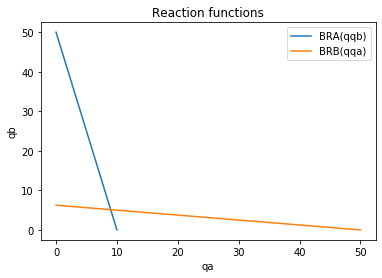

In [26]:
# Plot the two best response functions (bemærk det er egne beregninger. Kan ikke huske hvad der skal inverteres og sådan noget for at man kan lave det grafisk. Men de burde passe)

plt.plot([0,6,10],[50,20,0], label = 'BRA(qqb)')
plt.plot([0,10,50],[25/4,5,0], label = 'BRB(qqa)')
plt.legend()
plt.xlabel('qa')
plt.ylabel('qb')
plt.title('Reaction functions')

print("\n The kink point is the optimal quantities. For firm A: " + str(qqa) + "and for firm B:" + str(qqb)) 
